Make the required imports in order to use the packages.

In [1]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import teamgamelog, commonallplayers, playergamelog
import matplotlib.pyplot as plt
import time

Get a list of all players and their respective teams.

In [2]:
season = '2023-24'
allPlayers = commonallplayers.CommonAllPlayers(season=season, is_only_current_season=0, timeout=60).get_dict()
activePlayers = []

for player in allPlayers['resultSets'][0]['rowSet']:
	if player[3] == 1:
		activePlayers.append(player)

Let's create an object where all the data we pull will get stored.

In [3]:
pointsData = {}

Let's filter through each team and get the total fantasy points they had scored throughout the season.

In [4]:
allTeams = teams.get_teams()
for team in allTeams:
	pointsData[team['full_name']] = []
	fpoints = []
	time.sleep(3.5)
	teamGames = teamgamelog.TeamGameLog(team['id'], season, timeout=120).get_dict()
	for game in reversed(teamGames['resultSets'][0]['rowSet']):
		fieldGoalsMade = 2 * game[9]
		fieldGoalsAttempted = -1 * game[10]
		threePointersMade = game[12]
		freeThrowsMade = game[15]
		freeThrowsAttempted = -1 * game[16]
		rebounds = game[20]
		assists = 2 * game[21]
		steals = 4 * game[22]
		blocks = 4 * game[23]
		turnovers = -2 * game[24]
		points = game[26]
		fpoints.append(
			fieldGoalsMade + fieldGoalsAttempted +
			freeThrowsMade + freeThrowsAttempted +
			threePointersMade +
			rebounds + assists +
			steals + blocks +
			turnovers + points
		)
	
	print(team['full_name'], '->', sum(fpoints))
	pointsData[team['full_name']].append(sum(fpoints))


Atlanta Hawks -> 19783
Boston Celtics -> 21469
Cleveland Cavaliers -> 19650
New Orleans Pelicans -> 20071
Chicago Bulls -> 19245
Dallas Mavericks -> 19761
Denver Nuggets -> 20637
Golden State Warriors -> 20337
Houston Rockets -> 19226
Los Angeles Clippers -> 19960
Los Angeles Lakers -> 20445
Miami Heat -> 18586
Milwaukee Bucks -> 20122
Minnesota Timberwolves -> 20004
Brooklyn Nets -> 18799
New York Knicks -> 18923
Orlando Magic -> 18773
Indiana Pacers -> 21821
Philadelphia 76ers -> 20029
Phoenix Suns -> 20232
Portland Trail Blazers -> 17261
Sacramento Kings -> 20016
San Antonio Spurs -> 19856
Oklahoma City Thunder -> 21492
Toronto Raptors -> 19352
Utah Jazz -> 19459
Memphis Grizzlies -> 18310
Washington Wizards -> 19378
Detroit Pistons -> 17991
Charlotte Hornets -> 17806


Now, let's go through each team and compile data on how many points each player on that team has scored throughout that season.

In [6]:
for team in allTeams:
	teamPlayers = []
	for player in activePlayers:
		if team['id'] == player[8]:
			teamPlayers.append(player)
	ppoints = {}
	for player in teamPlayers:
		time.sleep(3.5)
		gameLog = playergamelog.PlayerGameLog(player[0], season, timeout=120).get_dict()
		fpoints = []
		for game in gameLog['resultSets'][0]['rowSet']:
			fieldGoalsMade = 2 * game[7]
			fieldGoalsAttempted = -1 * game[8]
			threePointersMade = game[10]
			freeThrowsMade = game[13]
			freeThrowsAttempted = -1 * game[14]
			rebounds = game[18]
			assists = 2 * game[19]
			steals = 4 * game[20]
			blocks = 4 * game[21]
			turnovers = -2 * game[22]
			points = game[24]
			fpoints.append(
				fieldGoalsMade + fieldGoalsAttempted +
				freeThrowsMade + freeThrowsAttempted +
				threePointersMade +
				rebounds + assists +
				steals + blocks +
				turnovers + points
			)
		ppoints[player[2]] = sum(fpoints)
		print(player[2], sum(fpoints))
	pointsData[team['full_name']].append(ppoints)

Saddiq Bey 1561
Bogdan Bogdanović 2432
Kobe Bufkin 177
Clint Capela 2254
Bruno Fernando 690
Trent Forrest 310
AJ Griffin 56
Mouhamed Gueye 83
De'Andre Hunter 1377
Jalen Johnson 2091
Vít Krejčí 348
Seth Lundy 12
Garrison Mathews 622
Wesley Matthews 290
Dejounte Murray 3339
Onyeka Okongwu 1419
Dylan Windler 96
Trae Young 2540
Oshae Brissett 482
Jaylen Brown 2697
JD Davison 50
Sam Hauser 1483
Jrue Holiday 2206
Al Horford 1728
Luke Kornet 1100
Svi Mykhailiuk 323
Drew Peterson 25
Kristaps Porziņģis 2309
Payton Pritchard 1768
Neemias Queta 448
Jaden Springer 438
Jayson Tatum 3476
Xavier Tillman 916
Jordan Walsh 61
Derrick White 2707
Jarrett Allen 2934
Emoni Bates 59
Darius Garland 1910
Ty Jerome 9
Damian Jones 267
Caris LeVert 2061
Sam Merrill 939
Donovan Mitchell 2681
Evan Mobley 1923
Isaiah Mobley 47
Marcus Morris Sr. 582
Pete Nance 3
Georges Niang 1366
Isaac Okoro 1403
Craig Porter Jr. 685
Max Strus 1933
Tristan Thompson 472
Dean Wade 848
Jose Alvarado 975
Dyson Daniels 1230
Jordan Hawkin

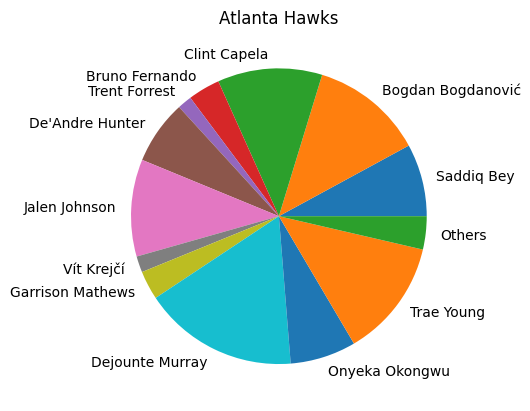

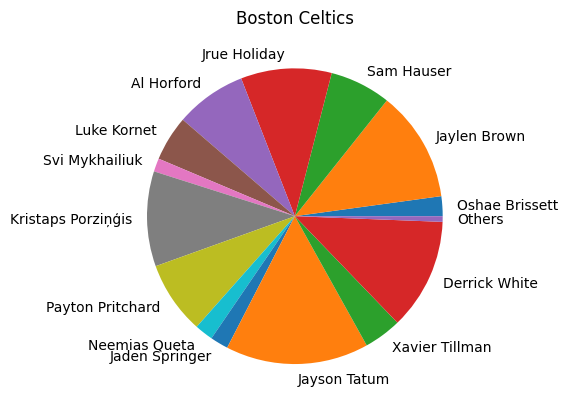

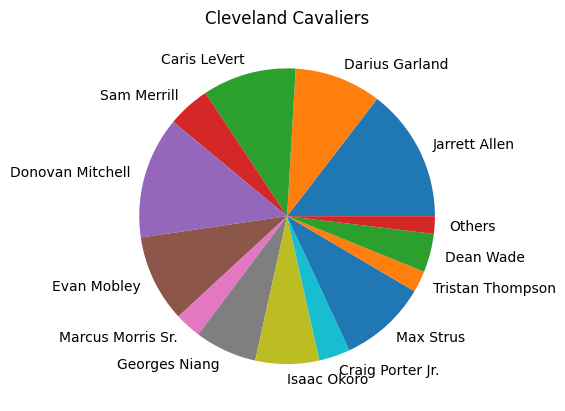

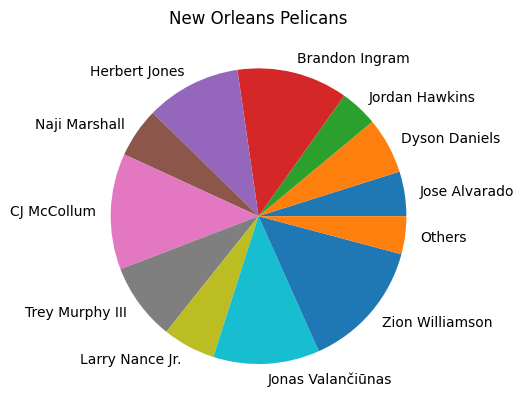

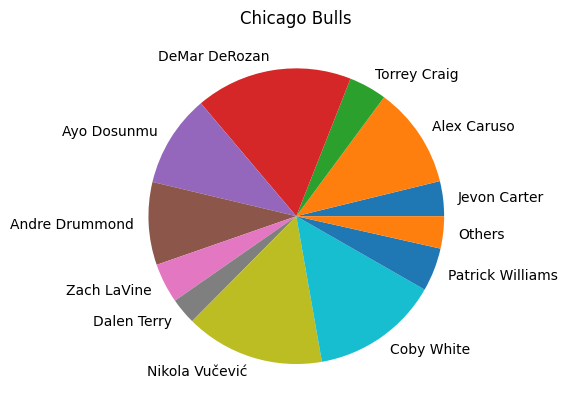

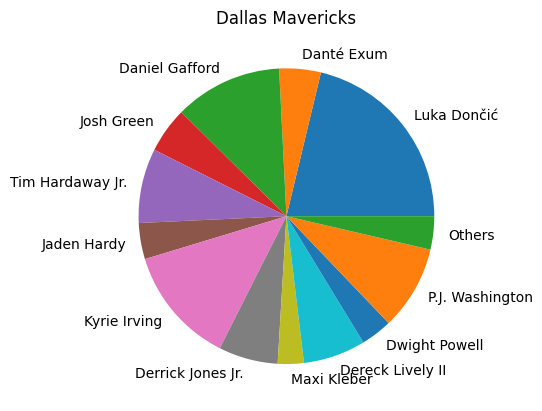

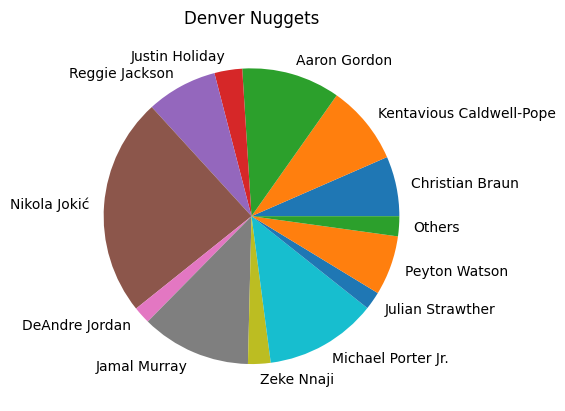

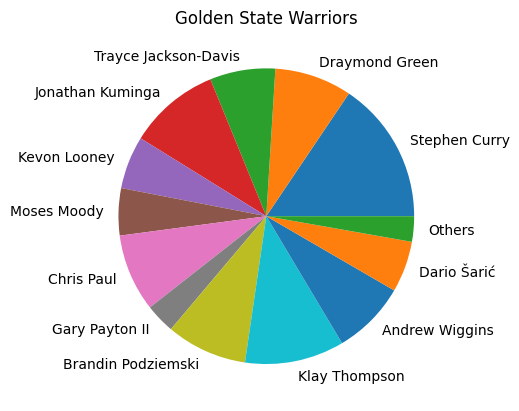

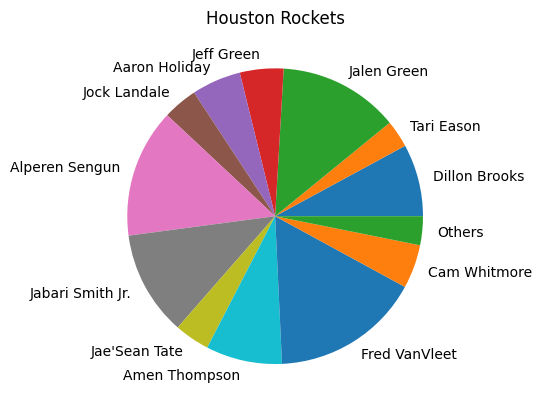

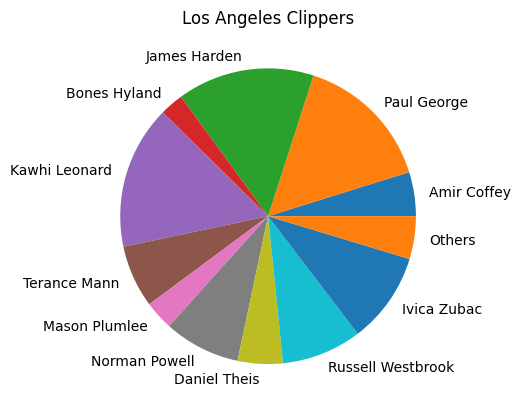

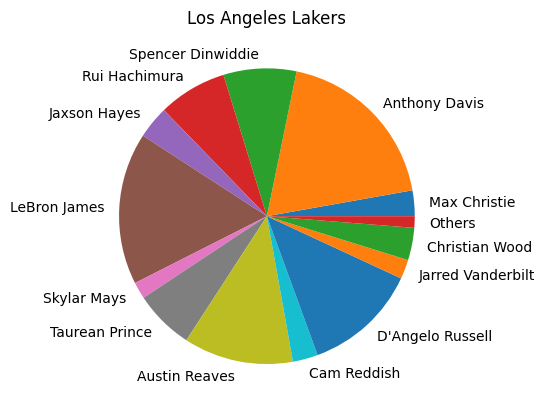

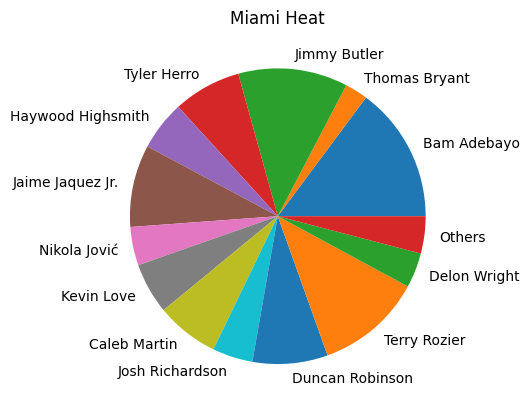

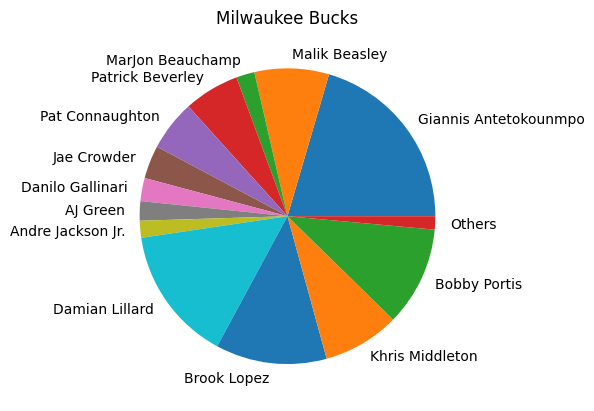

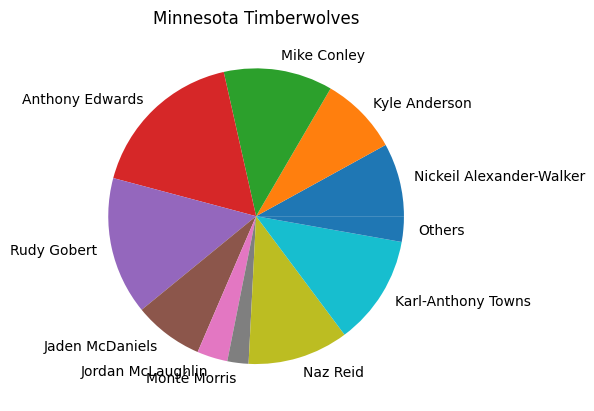

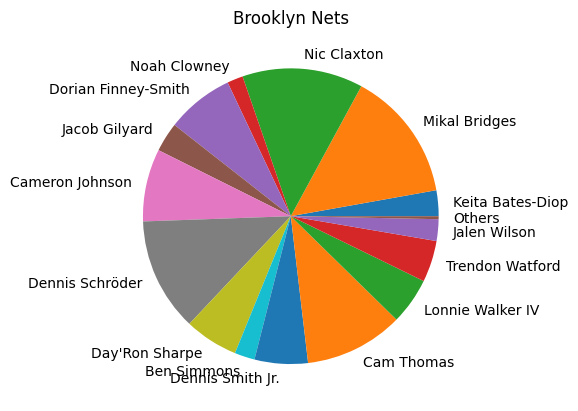

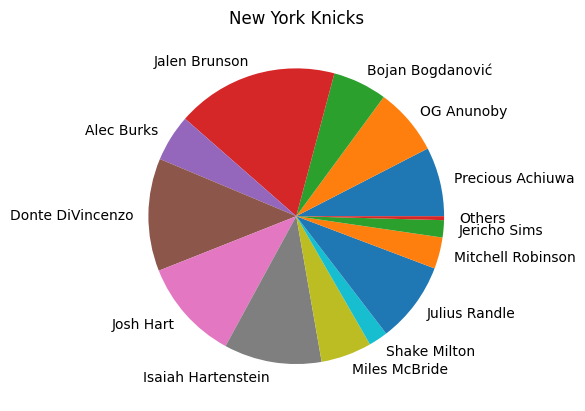

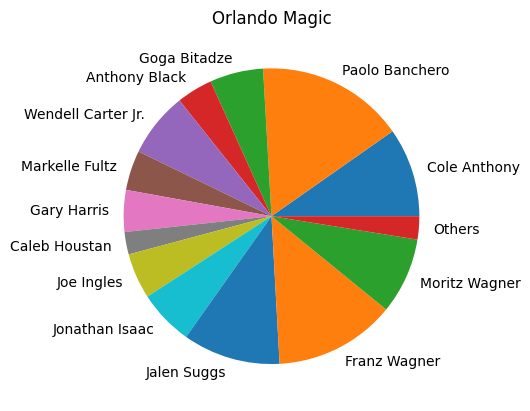

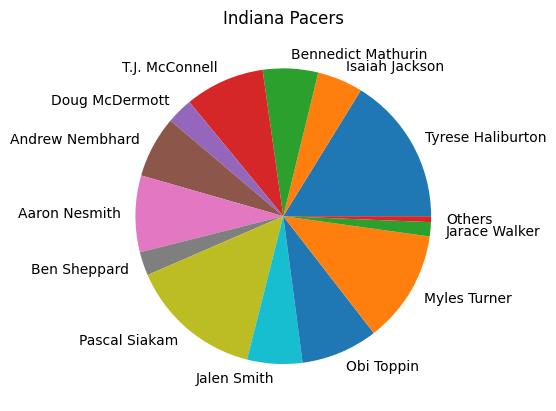

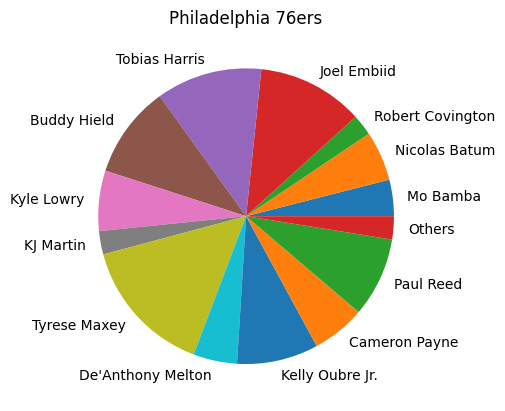

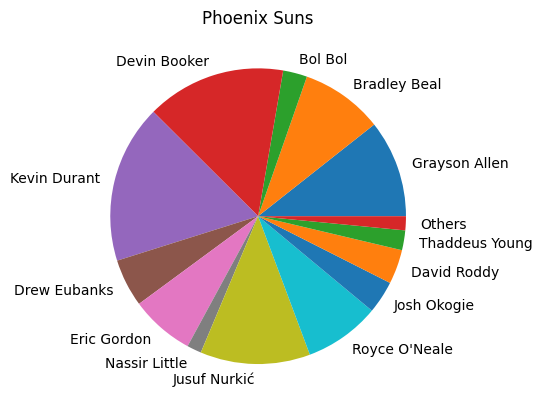

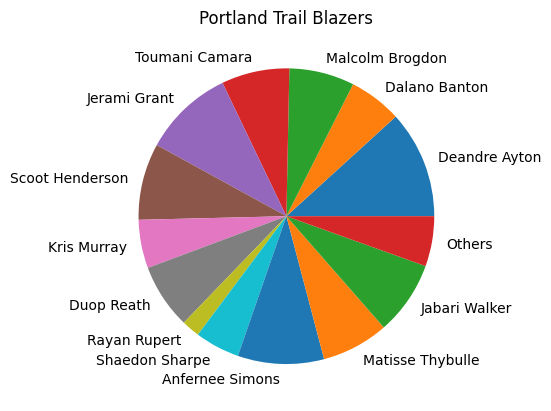

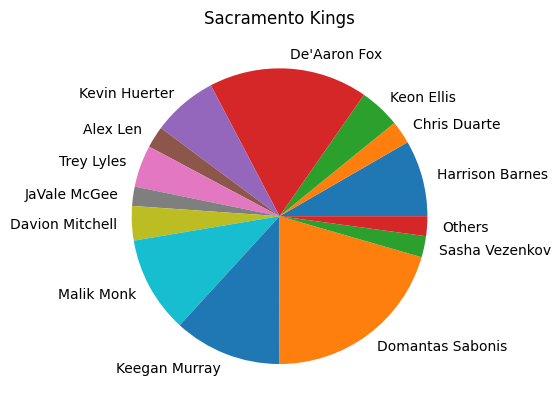

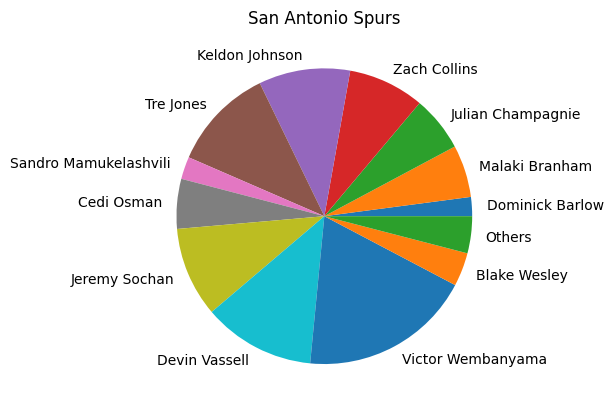

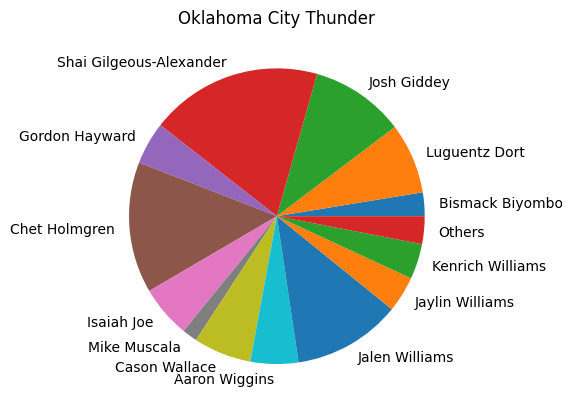

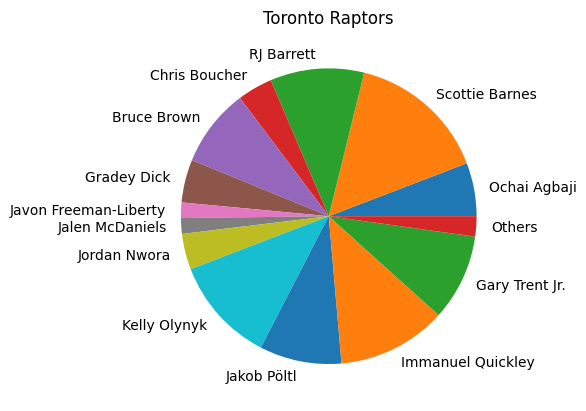

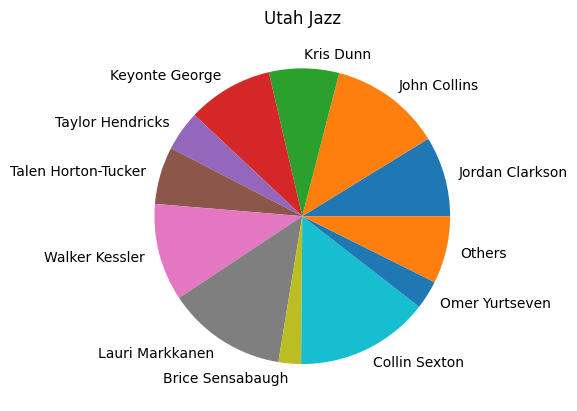

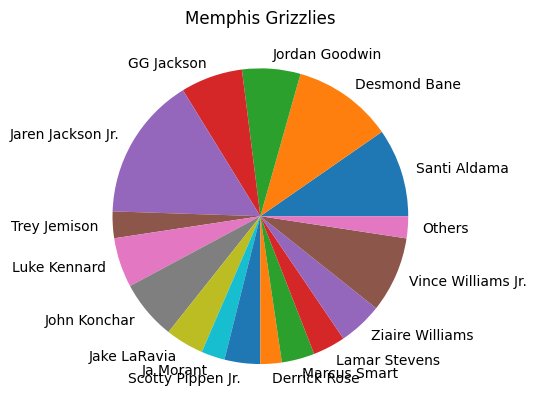

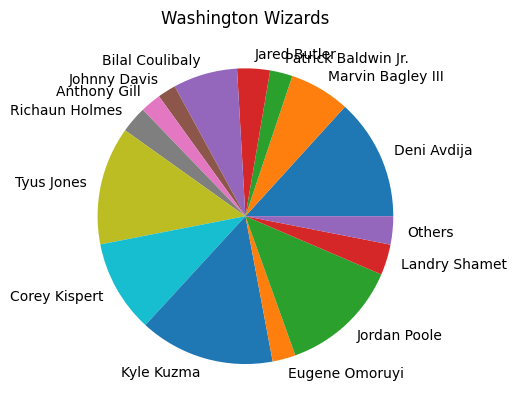

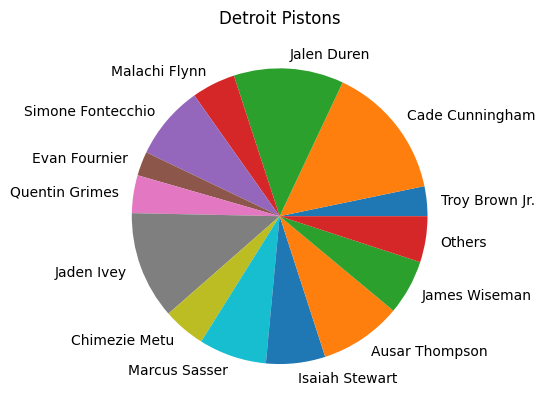

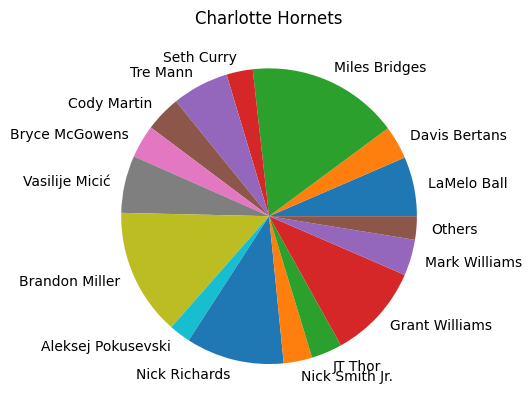

In [30]:
for team in pointsData:
	labels = []
	sizes = []
	others = 0
	for player in pointsData[team][1]:
		if round(pointsData[team][1][player] / pointsData[team][0], 2) >= 0.02:
			sizes.append(pointsData[team][1][player])
			labels.append(player)
		else:
			others += pointsData[team][1][player]
	sizes.append(others)
	labels.append("Others")
	plt.pie(sizes, labels=labels)
	plt.title(team)
	plt.show()